In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get dataset

# train data
dtr = pd.read_csv('~/Documents/ML-USU-SP21-main/dataset/dsn-prebootcamp-2021/train.csv')
X_tr = dtr.drop(['Customer_ID','Certification','Effective To Date','Active_Policy','Sales Channel','Best_Offer'],axis = 1)
y_tr = pd.DataFrame(dtr['Best_Offer'])

# test data
dte = pd.read_csv('~/Documents/ML-USU-SP21-main/dataset/dsn-prebootcamp-2021/test.csv')
X_te = dte.drop(['Customer_ID','Certification','Effective To Date','Active_Policy','Sales Channel'],axis = 1)
# sum(dtr.duplicated())
# sum(dte.duplicated())

In [3]:
X_tr.info()
X_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sex                            6393 non-null   object 
 1   Earnings                       6393 non-null   int64  
 2   Region_Code                    6393 non-null   object 
 3   Marital Status                 6393 non-null   object 
 4   State_of_Origin                6393 non-null   object 
 5   Customer_Worth                 6393 non-null   float64
 6   Customer_Reply                 6393 non-null   object 
 7   Plan                           6393 non-null   object 
 8   Status_of_Employment           6393 non-null   object 
 9   Premium_Auto_per_Month         6393 non-null   int64  
 10  Total Claim Amount             6393 non-null   float64
 11  Vehicle Class                  6393 non-null   object 
 12  Vehicle Size                   6393 non-null   o

In [25]:
# X_te.nunique()

pd.crosstab(y_tr['Best_Offer'], y_tr['Best_Offer'], normalize='all') * 100
# y_tr.unique()

Best_Offer,0,1,2,3
Best_Offer,,,,
0,41.295167,0.000000,0.00000,0.000000
1,0.000000,32.003754,0.00000,0.000000
2,0.000000,0.000000,15.28234,0.000000
3,0.000000,0.000000,0.00000,11.418739


In [26]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_tr, y_tr = oversample.fit_resample(X_tr, y_tr)

In [27]:
pd.crosstab(y_tr['Best_Offer'], y_tr['Best_Offer'], normalize='all') * 100

Best_Offer,0,1,2,3
Best_Offer,,,,
0,25.0,0.0,0.0,0.0
1,0.0,25.0,0.0,0.0
2,0.0,0.0,25.0,0.0
3,0.0,0.0,0.0,25.0


In [28]:
y_tr['Best_Offer'].value_counts()

0    2640
1    2640
2    2640
3    2640
Name: Best_Offer, dtype: int64

In [29]:
Le = LabelEncoder()

# train dataset

X_tr['Sex'] = Le.fit_transform(X_tr['Sex'])
X_tr['Region_Code'] = Le.fit_transform(X_tr['Region_Code'])
X_tr['Marital Status'] = Le.fit_transform(X_tr['Marital Status'])
X_tr['State_of_Origin'] = Le.fit_transform(X_tr['State_of_Origin'])
X_tr['Customer_Reply'] = Le.fit_transform(X_tr['Customer_Reply'])
X_tr['Plan'] = Le.fit_transform(X_tr['Plan'])
X_tr['Status_of_Employment'] = Le.fit_transform(X_tr['Status_of_Employment'])
X_tr['Vehicle Class'] = Le.fit_transform(X_tr['Vehicle Class'])
X_tr['Vehicle Size'] = Le.fit_transform(X_tr['Vehicle Size'])
X_tr['kind_of_policy'] = Le.fit_transform(X_tr['kind_of_policy'])

# test dataset

X_te['Sex'] = Le.fit_transform(X_te['Sex'])
X_te['Region_Code'] = Le.fit_transform(X_te['Region_Code'])
X_te['Marital Status'] = Le.fit_transform(X_te['Marital Status'])
X_te['State_of_Origin'] = Le.fit_transform(X_te['State_of_Origin'])
X_te['Customer_Reply'] = Le.fit_transform(X_te['Customer_Reply'])
X_te['Plan'] = Le.fit_transform(X_te['Plan'])
X_te['Status_of_Employment'] = Le.fit_transform(X_te['Status_of_Employment'])
X_te['Vehicle Class'] = Le.fit_transform(X_te['Vehicle Class'])
X_te['Vehicle Size'] = Le.fit_transform(X_te['Vehicle Size'])
X_te['kind_of_policy'] = Le.fit_transform(X_te['kind_of_policy'])

In [30]:
X_tr.tail(20)

,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Status_of_Employment,Premium_Auto_per_Month,Total Claim Amount,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy
10540,0,124921,0,1,2,5915.907740,1,0,1,146,55.635847,0,1,12,48,0,8,0
10541,0,130395,0,0,1,10446.070558,1,2,1,349,217.757774,2,1,9,50,0,3,1
10542,0,82180,2,0,3,3663.336991,1,2,1,185,384.792239,0,1,10,44,0,1,1
10543,0,107304,0,1,2,8825.937013,1,0,1,155,159.985070,4,1,2,26,0,2,1
10544,1,153895,0,0,4,9576.655572,1,2,1,158,57.553533,0,2,2,17,0,2,0
10545,1,48837,1,1,0,2455.906278,1,0,1,125,301.934000,0,2,6,18,0,1,0
10546,0,119446,1,1,1,2723.793507,1,0,1,136,267.671849,0,1,21,18,1,1,1
10547,0,0,1,2,2,2416.840261,1,0,3,140,507.162945,1,2,2,14,0,1,0
10548,0,52523,0,1,1,3859.029770,1,1,1,194,453.294829,0,1,6,58,0,1,1
10549,1,57160,1,1,0,5205.473950,1,0,1,132,318.431733,0,1,22,89,0,3,1


In [38]:
rf = RandomForestClassifier(random_state=1000, class_weight='balanced_subsample')
pipe = Pipeline([
    ('scale' , StandardScaler()),
    ('model' , rf)
])
# pipe.get_params()
mod = rf.fit(X_tr, y_tr)
y = pd.DataFrame(mod.predict(X_te))
grid = GridSearchCV(
    estimator = rf,
    param_grid = {
        'n_estimators':[100], 'criterion':['entropy','gini'],
        'max_features':['log2','auto','sqrt'], 'max_depth':[10]
    },
    refit = True, 
    verbose=2,
    cv = 5,
    n_jobs = -1
)
model = grid.fit(X_tr,y_tr).predict(X_te)
y_te = pd.DataFrame(model)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [32]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 100}

In [33]:
importance = rf.feature_importances_
importance

array([0.0198058 , 0.1047132 , 0.022551  , 0.03119047, 0.04383219,
       0.11765415, 0.03696188, 0.02373307, 0.02280458, 0.10122663,
       0.10704126, 0.03810084, 0.02673688, 0.09361158, 0.11184655,
       0.02972362, 0.04679107, 0.02167522])

In [34]:
FIM = pd.DataFrame({'Features': X_tr.columns , 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
0,Sex,0.019806
17,kind_of_policy,0.021675
2,Region_Code,0.022551
8,Status_of_Employment,0.022805
7,Plan,0.023733
12,Vehicle Size,0.026737
15,Counts_of_Open_Complaints,0.029724
3,Marital Status,0.031190
6,Customer_Reply,0.036962
11,Vehicle Class,0.038101


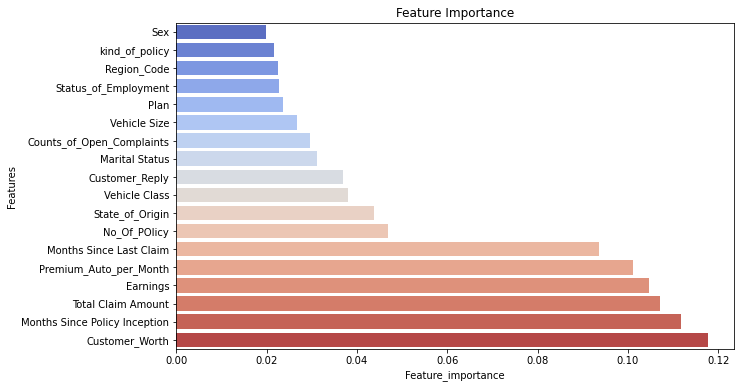

In [35]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y = 'Features', x = 'Feature_importance', data = FIM, palette = 'coolwarm')
plt.show()

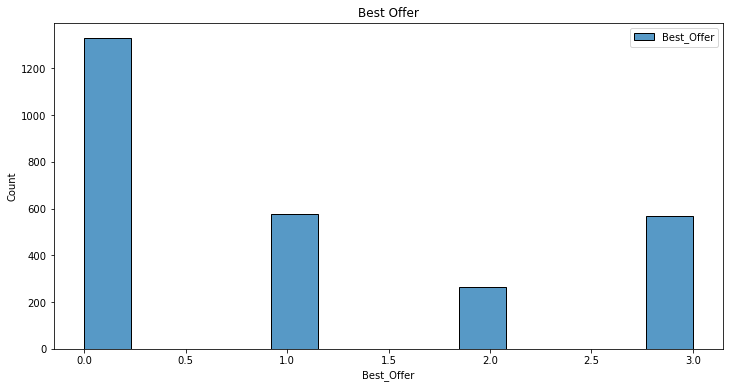

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(y_te)
plt.title('Best Offer')
plt.xlabel('Best_Offer')
plt.savefig('best_offer1.png')
plt.legend(['Best_Offer'])
plt.show()

In [37]:
df1 = pd.concat([dte['Customer_ID']], axis = 1)
df1['best_offer'] = y
df1.to_csv('submit3.csv',index=False)